# Predicting Party Inclination Based on Tweets

## Notebook Setup: Libraries and Dataset

In [3]:
import pandas as pd
import numpy as np
import json
from kaggle.api.kaggle_api_extended import KaggleApi
import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# import geopandas as gpd

In [4]:
kaggle_api_key = {"username":"juliovalenzuelapavez","key":"872264e6359a29b4870553c91392dbdc"}

# Set Kaggle API credentials as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_api_key['username']
os.environ['KAGGLE_KEY'] = kaggle_api_key['key']
# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

In [5]:
# Download the dataset (replace 'uciml/iris' with your dataset identifier)
dataset = 'manchunhui/us-election-2020-tweets'
api.dataset_download_files(dataset, path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets


In [6]:
df_donaldtrump = pd.read_csv('hashtag_donaldtrump.csv', lineterminator='\n')
df_joebiden = pd.read_csv('hashtag_joebiden.csv', lineterminator='\n')

In [7]:
df_donaldtrump['hashtag'] = 'donaldtrump'
df_joebiden['hashtag'] = 'joebiden'
merged_df = pd.concat([df_donaldtrump, df_joebiden], ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_tweets.csv', index=False)
del df_donaldtrump, df_joebiden

In [ ]:
import pandas as pd
import numpy as np
merged_df = pd.read_csv('merged_tweets.csv',lineterminator='\n')
merged_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,hashtag\r
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,donaldtrump\r
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,donaldtrump\r
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,donaldtrump\r
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,donaldtrump\r
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,donaldtrump\r


## Data Preparation

In [8]:
merged_df = merged_df[(merged_df['country'] == 'United States of America' )| (merged_df['country'] == 'United States') ]

In [9]:
merged_df[(merged_df['country'] == 'United States of America' )| (merged_df['country'] == 'United States') ]['state'].nunique()

54

In [10]:
# District of Columbia is actually Washington D.C.
merged_df.loc[merged_df['state'] == 'Washington', 'state'] = 'District of Columbia'

# Get rid of the rows where state is 'Northern Mariana Islands', 'Puerto Rico', 'Guam' or np.nan
states_to_remove = ['Northern Mariana Islands', 'Guam', np.nan]
merged_df = merged_df[~merged_df['state'].isin(states_to_remove)]

In [ ]:
merged_df.shape

(332457, 22)

In [ ]:
from transformers import pipeline
from tensorflow import keras
device = 0 if torch.cuda.is_available() else -1

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli",device=device)

# Define labels
labels = ['democrat fan','republican fan']



c:\Users\julit\anaconda3\envs\cudadl\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\julit\anaconda3\envs\cudadl\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\julit\anaconda3\envs\cudadl\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\julit\anaconda3\envs\cudadl\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses 

{'sequence': 'Y’all Just Locking Up Accounts Cause YALL Dont Want The Truth To Come Out About #Biden That’s Crazy Af',
 'labels': ['democrat fan', 'republican fan'],
 'scores': [0.5634272694587708, 0.43657276034355164]}

In [ ]:
# Classify tweets
classifier("Y’all Just Locking Up Accounts Cause YALL Dont Want The Truth To Come Out About #Biden That’s Crazy Af", labels)

{'sequence': 'Y’all Just Locking Up Accounts Cause YALL Dont Want The Truth To Come Out About #Biden That’s Crazy Af',
 'labels': ['democrat fan', 'republican fan'],
 'scores': [0.5634272694587708, 0.43657276034355164]}

In [ ]:
def classify_tweet(tweet):
    _,label_h, score_h = classifier(tweet, ['democrat fan','republican fan'] ,device=device).items()
    label_h = label_h[1]
    score_h = score_h[1]

    # Create a dictionary from labels and scores for easy access
    label_scores = dict(zip(label_h, score_h))

    # Get the highest score between democrat fan and republican fan
    democrat_score = label_scores.get('democrat fan', 0)
    republican_score = label_scores.get('republican fan', 0)
    political_highest = 'democrat fan' if democrat_score > republican_score else 'republican fan'

    return political_highest,democrat_score,republican_score



In [ ]:
# exclude tweets with less than 3 words
merged_df['tweet_length'] = merged_df['tweet'].apply(lambda x: len(x.split()))
merged_df = merged_df[merged_df['tweet_length'] > 3]

#exclude tweets from the day of election: november 3rd
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'])
merged_df = merged_df[merged_df['created_at'] != '2020-11-03']



In [ ]:
# shuffle merged_df and take the first 1000
sample_df = merged_df.sample(frac=1).reset_index(drop=True)
sample_df = sample_df.head(40000)

In [ ]:
sample_df['target'],sample_df['democrat_score'],sample_df['republican_score'] = zip(*sample_df['tweet'].apply(classify_tweet))
sample_df.head()

c:\Users\julit\anaconda3\envs\cudadl\lib\site-packages\transformers\pipelines\base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,country,continent,state,state_code,collected_at,hashtag,tweet_length,target,democrat_score,republican_score
0,2020-11-06 07:51:29,1.324620e+18,Vorrei vincesse #Trump se non altro per veder ...,0.0,0.0,Twitter for Android,2.175260e+08,Drew Castaway™ 🇮🇹 ✝,Drew_Castaway,Anche se dovessi camminare in una valle oscura...,...,United States of America,North America,Arkansas,AR,2020-11-07 11:32:37.166881,donaldtrump,13,republican fan,0.045616,0.954384
1,2020-10-22 13:34:25,1.319271e+18,@JasonMillerinDC let's talk about your abortio...,0.0,0.0,Twitter Web App,8.171077e+17,Blair Dorothy,BlairWeddings,Plans and promote weddings.,...,United States of America,North America,California,CA,2020-10-27 18:11:50.153983,joebiden,16,democrat fan,0.819378,0.180622
2,2020-10-15 00:30:37,1.316537e+18,Artists for #JoeBiden \n\nUncle Kracker - Drif...,1.0,0.0,Twitter Web App,2.919063e+09,#CharlesPumilia DC Senate WRITE IN 2020,CharlesPumilia,Write Charles Pumilia on your DC BALLOT to sho...,...,United States of America,North America,District of Columbia,DC,2020-10-21 00:04:35.484114569,joebiden,13,democrat fan,0.968244,0.031756
3,2020-11-02 22:31:00,1.323392e+18,"another lie. #Trump didn't write this, he can...",0.0,0.0,Twitter Web App,2.371464e+07,ncgazette,ncgazette,Daily online news publication covering New Yor...,...,United States of America,North America,New York,NY,2020-11-04 10:21:00.607476,donaldtrump,18,republican fan,0.388977,0.611023
4,2020-11-07 18:19:52,1.325141e+18,@realdonaldtrump #donaldjtrump #trump #trump20...,0.0,0.0,Instagram,8.639009e+08,Chris Lawrence,Creechamania,I don’t take this thing seriously and neither ...,...,United States of America,North America,Ohio,OH,2020-11-08 10:50:19.809687,donaldtrump,10,republican fan,0.032340,0.967660


In [ ]:
sample_df.to_csv('sample_tweets.csv', index=False,sep=';')

In [ ]:
sample_df.shape

(40000, 26)

## label ~40k tweets and retrieve the top 30% of highest difference, around 80% diff

In [ ]:
# calculate the difference between the scores in absolute value
sample_df['score_diff'] = abs(sample_df['democrat_score'] - sample_df['republican_score'])

# cut where the difference is greater than 0.5
sample_df_filetered = sample_df[sample_df['score_diff'] > 0.80]

sample_df_filetered.shape

(13651, 27)

In [ ]:
sample_df_filetered['target'].value_counts()

target
democrat fan      8956
republican fan    4695
Name: count, dtype: int64

In [ ]:
# balance the dataset


sample_df_filetered = sample_df_filetered.groupby('target').apply(lambda x: x.sample(n=4695)).reset_index(drop=True)

sample_df_filetered['target'].value_counts()

target
democrat fan      4695
republican fan    4695
Name: count, dtype: int64

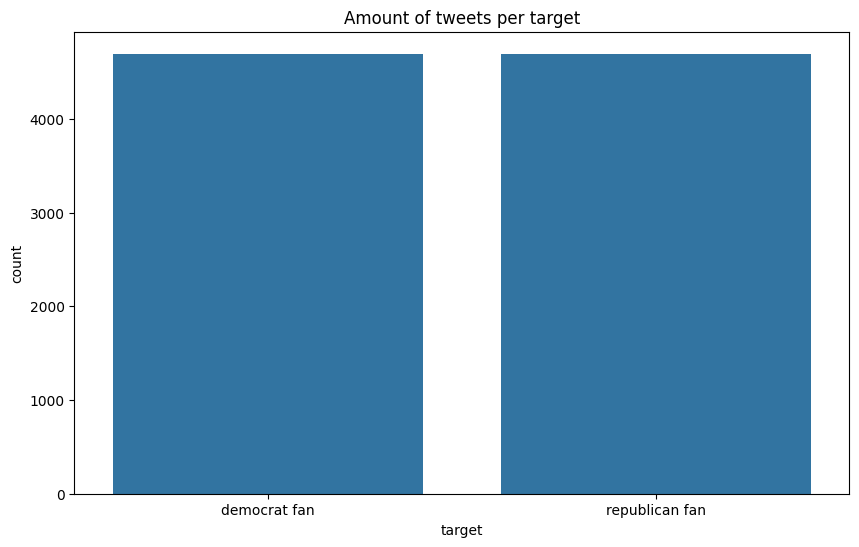

In [ ]:
# plot the amount of tweets per target
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=sample_df_filetered)
plt.title('Amount of tweets per target')
plt.show()

In [ ]:
sample_df_filetered.to_csv('sample_tweets_balanced.csv', index=False,sep=';')

In [ ]:
pd.options.display.max_colwidth = 150
sample_df_filetered.sort_values(by='score_diff',ascending=True).head(10)[['tweet','democrat_score','republican_score','target']]

,tweet,democrat_score,republican_score,target
5682,Has ghislaine maxwell gotten a mail-in ballot? #Trump #Vote2020,0.099998,0.900002,republican fan
5134,"MAGA, you’re being played. (again) \n\nThis is today’s GOP. #trump #gop #maga #Election2020 #VoteBlue2020 #RememberinNovember #VoteThemAllOut\n\nV...",0.099996,0.900004,republican fan
6074,Chickity check yo self before you wreck yo self. #IceCube #trump https://t.co/AKlp9Re2pr,0.099970,0.900030,republican fan
8810,#Europe is showing their displeasure on #Covid19 restrictions because #DonaldTrump and his supporters have shown the world it’s ok to not follow r...,0.099929,0.900071,republican fan
915,Momento pubblicità per @FoxNews intanto. #Biden #elections2020 https://t.co/g6iqGKG87l,0.900075,0.099925,democrat fan
2100,#Agree! I keep writing to @SpeakerPelosi @SenSchumer @TedLieu telling them to DO SOMETHING! If I did half of what #Giuliani /#Trump/ #LouisDeJoy/ ...,0.900101,0.099899,democrat fan
8305,#Election2020\n#DonaldTrump. Total election fraud!!!\n\nTaking A Razor To The Dismal Of Election Fraud Accusations https://t.co/B3OzsD6RsG via @wo...,0.099884,0.900116,republican fan
6381,"Hey Joe,\nJust voted for @realDonaldTrump @senatemajldr @RepAndyBarr \n\nYou know them.\nThey're the people who won't cripple our economy by takin...",0.099876,0.900124,republican fan
7677,"Newly ""immune"" #Trump to hold rally in #Janesville despite surging #COVID19 cases.\n\n#COVID19WI \n\nhttps://t.co/mghAkJcglH",0.099863,0.900137,republican fan
8050,@DemocracyStorm It's almost like the primary diplomat for the #USA can't even manage to be diplomatic during a short interview?\n#Trump's #TemperT...,0.099855,0.900145,republican fan


# KTrain

In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 54.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 72.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 54.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.3-py3-none-any.whl size=25316960 sha256=3cdde78c868f57690a2e6bae84b8f9492b0857369006b3a085c6a6c369643203
  Stored in directory: /root/.cache/pip/wheels/fc/76/11/5b953090eebf531f660948a30cd26e70260619f6480f186a5a
  Created wheel for keras_bert: filename=

In [ ]:
import tensorflow as tf
import ktrain
import pandas as pd
from ktrain import text
import

In [ ]:
training_df = pd.read_csv('sample_tweets_balanced.csv', sep=';', lineterminator='\n', index_col=0)
training_df = training_df.sample(frac=1).reset_index(drop=True)
training_df.head()

,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,...,continent,state,state_code,collected_at,hashtag,tweet_length,target,democrat_score,republican_score,score_diff\r
0,1.325437e+18,'#SNL' host #DaveChappelle urges #Biden voters...,0.0,0.0,In-House App for rgovconsulting,3.362915e+09,Adam Roosevelt,rooseveltFellow,"Serving the Homeland. Executive, Reagan Republ...",2015-07-06 19:51:34,...,North America,Texas,TX,2020-11-09 18:35:09.402069,joebiden,12,democrat fan,0.962542,0.037458,0.925085
1,1.323794e+18,CNN Projection: #Biden wins #DC https://t.co/T...,0.0,0.0,Twitter for iPhone,5.383989e+08,Boris F. Palomá 🧶,BorisPaloma,GWOT Veteran - Corpsman - Different Breed - Fa...,2012-03-27 18:52:27,...,North America,Massachusetts,MA,2020-11-05 13:03:08.063298,joebiden,6,democrat fan,0.949618,0.050382,0.899235
2,1.320623e+18,@Dolphfinn33 @real_defender Democratic states ...,0.0,0.0,Twitter for Android,1.263310e+18,Joe Jacobs,joejacobsNY,Real Estate Investor | Financial Advisor |.,2020-05-21 03:24:18,...,North America,New York,NY,2020-10-27 17:37:27.473310,donaldtrump,24,democrat fan,0.959356,0.040644,0.918712
3,1.319443e+18,jper1: And this is why a “@JoeBiden” will get ...,0.0,0.0,NaN,1.810210e+07,Chris Rabalais (ASM Co-Founder/Sports Vote),chrisrabalais,Co-Founder of The World's First Sports Stock M...,2008-12-13 18:07:26,...,North America,California,CA,2020-10-27 17:53:26.093229,donaldtrump,43,democrat fan,0.909956,0.090044,0.819913
4,1.317645e+18,@crampell And #joebiden supported it... https:...,0.0,0.0,Twitter for iPhone,1.283613e+18,MikeHunt,MikeHun17920255,Enjoy everyday like it’s your last🍸 Treat othe...,2020-07-16 04:03:53,...,North America,Massachusetts,MA,2020-10-21 06:38:42.584821187,joebiden,6,democrat fan,0.906533,0.093466,0.813067


In [ ]:
trn, val, preproc = text.texts_from_df(training_df,'tweet',preprocess_mode='bert',label_columns='target',verbose=True, maxlen=32) # Process the input tweets based on the BERT encoder

model = text.text_classifier('bert', trn, preproc=preproc) # Create a text classifier that uses the BERT-based representations created before

learner = ktrain.get_learner(model, train_data=trn, val_data=val,  batch_size=128) # Creates the learning process to fine-tune bert and train the classifier.

['democrat fan', 'republican fan']
      democrat fan  republican fan
897            1.0             0.0
4476           1.0             0.0
4855           0.0             1.0
4798           0.0             1.0
4885           0.0             1.0
['democrat fan', 'republican fan']
      democrat fan  republican fan
7820           1.0             0.0
1906           1.0             0.0
7743           0.0             1.0
8511           1.0             0.0
8888           0.0             1.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


Is Multi-Label? False
maxlen is 32


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
67/67 [==============================] - 73s 744ms/step - loss: 0.8039 - accuracy: 0.6010
Epoch 2/2
67/67 [==============================] - 44s 660ms/step - loss: 21.4789 - accuracy: 0.5210


done.
Visually inspect loss plot and select learning rate associated with falling loss


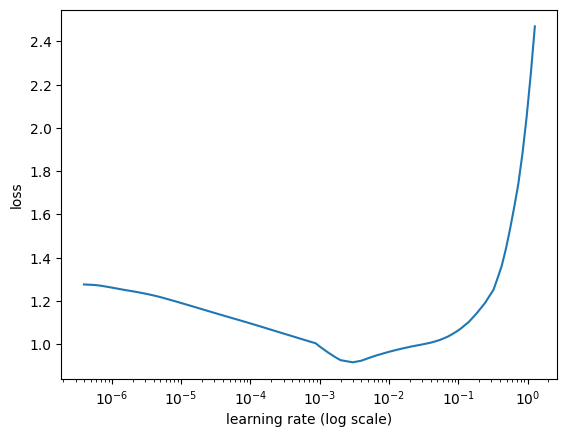

In [ ]:
learner.lr_find(show_plot=True, max_epochs=2)

In [ ]:
learner.autofit(lr=1e-4, # Learning Rate
                epochs=5, # Number of epochs to train the model
                early_stopping=2, # If the model does not improve after 2 epochs, we stop the training
                reduce_on_plateau=1,  # If the model does not improve aftear 1 epoch, we reduce the learning rate
                monitor='val_loss', # Metric to monitor the peformance of the model (loss computed on the validation dataset)
                checkpoint_folder='nlp_elections/models/transformer_cpt_1' # After each epoch we store a checkpoint of the model
                )



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/5
67/67 [==============================] - 79s 895ms/step - loss: 0.4561 - accuracy: 0.7868 - val_loss: 0.3150 - val_accuracy: 0.8647
Epoch 2/5
67/67 [==============================] - 56s 831ms/step - loss: 0.2475 - accuracy: 0.9033 - val_loss: 0.2431 - val_accuracy: 0.8967
Epoch 3/5
67/67 [==============================] - ETA: 0s - loss: 0.1601 - accuracy: 0.9405
Epoch 00003: Reducing Max LR on Plateau: new max lr will be 5e-05 (if not early_stopping).
67/67 [==============================] - 57s 847ms/step - loss: 0.1601 - accuracy: 0.9405 - val_loss: 0.2646 - val_accuracy: 0.8978
Epoch 4/5
67/67 [==============================] - ETA: 0s - loss: 0.0836 - accuracy: 0.9708
Epoch 00004: Reducing Max LR on Plateau: new max lr will be 2.5e-05 (if not early_stopping).
Restoring model weights from the end of the best epoch: 2.
67/67 [==============================] - 57s 849ms/step - loss: 0.0836 - ac

In [ ]:
learner.save_model('/content/drive/MyDrive/transformer_1') # Saving the trained model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
learner.unfreeze()
learner.fit_onecycle(1e-4/10, 1, checkpoint_folder='/content/drive/MyDrive/transformer_cpt_2')



begin training using onecycle policy with max lr of 1e-05...
67/67 [==============================] - 81s 901ms/step - loss: 0.1480 - accuracy: 0.9481 - val_loss: 0.2531 - val_accuracy: 0.8988


In [ ]:
learner.save_model('/content/drive/MyDrive/transformer_2') # Store the final model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
learner.validate(class_names=['democrat fan','republican fan'])

30/30 [==============================] - 7s 69ms/step
                precision    recall  f1-score   support

  democrat fan       0.90      0.90      0.90       468
republican fan       0.90      0.90      0.90       471

      accuracy                           0.90       939
     macro avg       0.90      0.90      0.90       939
  weighted avg       0.90      0.90      0.90       939



array([[420,  48],
       [ 47, 424]])

In [ ]:
learner.view_top_losses(n=10, preproc=preproc)

30/30 [==============================] - 2s 68ms/step
----------
id:508 | loss:5.5 | true:republican fan | pred:democrat fan)

[CLS] @ pete ##bu ##tti ##gie ##g # don ##win ##slow # country ##over ##par ##ty # kamal ##aha ##rri ##s # joe ##bid ##en there is a reason joe bid [SEP]
----------
id:778 | loss:5.28 | true:republican fan | pred:democrat fan)

[CLS] # fly # pen ##ce # trump # bid ##en ##har ##ris ##20 ##20 # debate https : / / t . co / b ##j ##j ##65 ##iz ##z [SEP]
----------
id:569 | loss:5.17 | true:democrat fan | pred:republican fan)

[CLS] ‘ can ’ t sleep huh ? ’ trump rid ##ic ##uled for 2 am t ##wee ##t begging senate republicans for help as re - election chances fade - [SEP]
----------
id:621 | loss:4.99 | true:republican fan | pred:democrat fan)

[CLS] # joe ##bid ##en needs huge tel ##ep ##rom ##pt ##er . there ' s an equal amount of trump voters at # bid ##en rally . . @ the [SEP]
----------
id:915 | loss:4.4 | true:republican fan | pred:democrat fan)

[CLS] just rem

# HuggingFace Transformers

We are gonna finetune the distilbert version for classifiying political tweets  https://huggingface.co/m-newhauser/distilbert-political-tweets

In [ ]:
!pip install transformers datasets torch
!pip install -U accelerate
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.0 MB/s eta 0:00:00
ERROR: Operation cancelled by user


### Load DF

In [ ]:
import pandas as pd

# Load the dataset
training_df = pd.read_csv('sample_tweets_balanced.csv', sep=';', lineterminator='\n', index_col=0)
training_df = training_df.sample(frac=1).reset_index(drop=True)

# Ensure labels are integers
training_df['target'] = (training_df['target']=='democrat fan').astype(int)

# Display the first few rows of the dataframe
training_df.head()


,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,...,continent,state,state_code,collected_at,hashtag,tweet_length,target,democrat_score,republican_score,score_diff\r
0,1.318673e+18,@KamalaHarris November 3rd?! I’ll vote by then...,6.0,0.0,Twitter for iPhone,6.147225e+08,Austin Basis,AustinBasis,Actor/Writer/Artist/Ally #T1D https://t.co/eJ5...,2012-06-22 00:55:48,...,North America,California,CA,2020-10-21 11:11:55.960947192,joebiden,35,1,0.963331,0.036669,0.926663
1,1.322688e+18,@realDonaldTrump Anti-Trump? PLEASE VOTE #Make...,0.0,0.0,Twitter for iPhone,7.827965e+17,THCPetDoctor,THCPetDoctor,"I represent a group of 240+ veterinarians, MDs...",2016-10-03 04:16:44,...,North America,California,CA,2020-11-01 10:51:47.347634,donaldtrump,20,1,0.931722,0.068278,0.863443
2,1.322500e+18,#Trump wants ME and MY WIFE dead! \n#CullTheHe...,0.0,0.0,Twitter Web App,9.160842e+17,Ed Crabbe,bustercrabbe7,"Proud Democrat, ex-Dept of Commerce, 5 kids, ...",2017-10-05 23:34:27,...,North America,Illinois,IL,2020-11-01 10:54:24.374008,donaldtrump,10,0,0.091415,0.908585,0.817169
3,1.319348e+18,#Trump #healthcare #ACA https://t.co/ZQiaWE69zt,1.0,0.0,Twitter for iPhone,7.990179e+17,Cunty Liberal,CuntyLiberal,"Historian, herbal medicine woman, apothecary, ...",2016-11-16 22:34:51,...,North America,California,CA,2020-10-27 17:54:57.766839,donaldtrump,4,0,0.043064,0.956936,0.913872
4,1.323646e+18,Philly GOP Sounds The Alarm On Dem Election Da...,2.0,1.0,Twitter Web App,7.414413e+07,Lisa Graas † Passionist † #Catholic,CatholicLisa,"† In Jesus, we all have a share. † Passionist ...",2009-09-14 12:30:04,...,North America,Kentucky,KY,2020-11-04 10:49:24.808500,donaldtrump,17,0,0.031531,0.968469,0.936937


### Prepare dataset for HF


In [ ]:
from datasets import Dataset

# Convert the dataframe to a Hugging Face dataset
# Only select the variables we are interested in
dataset = Dataset.from_pandas(training_df[['tweet','target']])

dataset

Dataset({
    features: ['tweet', 'target'],
    num_rows: 9390
})

### Tokenize Data

In [ ]:
from transformers import AutoTokenizer

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('m-newhauser/distilbert-political-tweets')

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['tweet'], padding='max_length', truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)


# Rename target column to 'labels'
tokenized_datasets = tokenized_datasets.rename_column("target", "labels")

# Remove the 'tweet' column as it is no longer needed
tokenized_datasets = tokenized_datasets.remove_columns(["tweet"])

# Check the tokenized dataset
tokenized_datasets


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/9390 [00:00<?, ? examples/s]

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 9390
})

## Prepare Data for training

In [ ]:
# Split the dataset into train and test
split_dataset = tokenized_datasets.train_test_split(test_size=0.1)

# Define the format for PyTorch
split_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

train_dataset = split_dataset['train']
test_dataset = split_dataset['test']


## Define accuracy metric

By default HF will calculate the loss, but we need the accuracy, so we load it with the datasets library (type "y" when prompted)

In [ ]:
from datasets import load_metric
import numpy as np

# Load accuracy
accuracy = load_metric('accuracy')


# Define a function to compute accuracy
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

<ipython-input-6-c2ecab08a0dc>:5: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy = load_metric('accuracy')


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [ ]:
# Define training arguments, chose the LR like the previous one

from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# Load the pre-trained model
model = AutoModelForSequenceClassification.from_pretrained('m-newhauser/distilbert-political-tweets', num_labels=2)

# Define the training arguments
training_args = TrainingArguments(
    output_dir='distilbert_rep_dem',
    eval_strategy='epoch',
    learning_rate=1e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    label_names = ['Democrat', 'Republican'],
    include_inputs_for_metrics = True

)

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
from transformers import DataCollatorWithPadding

# Create a custom data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.184000,No log
2,0.077600,No log
3,0.028500,No log


TrainOutput(global_step=1587, training_loss=0.09288935189586656, metrics={'train_runtime': 1278.3836, 'train_samples_per_second': 19.832, 'train_steps_per_second': 1.241, 'total_flos': 3358445958125568.0, 'train_loss': 0.09288935189586656, 'epoch': 3.0})

In [ ]:
eval_results = trainer.evaluate()
print(eval_results)

{'eval_runtime': 16.9775, 'eval_samples_per_second': 55.308, 'eval_steps_per_second': 3.475, 'epoch': 3.0}


In [ ]:
trainer.save_model("distilbert_rep_dem")

### Evaluate model

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('./distilbert_rep_dem')

eval_args = TrainingArguments(
    output_dir='./results',
    per_device_eval_batch_size=16,
)


trainer = Trainer(
    model=model,
    args=eval_args,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)


# Evaluate the model
eval_results = trainer.evaluate()
# Print the accuracy
print(f"Accuracy: {eval_results['eval_accuracy']}")

Accuracy: 0.9680511182108626


In [ ]:
!pip install transformers

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('juliovp/distilbert_republican_democrat_tweets')
model = AutoModelForSequenceClassification.from_pretrained("juliovp/distilbert_republican_democrat_tweets")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/732 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/792 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

## Predict tover the whole dataset

In [14]:
!pip install transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('juliovp/distilbert_republican_democrat_tweets')
model = AutoModelForSequenceClassification.from_pretrained('juliovp/distilbert_republican_democrat_tweets')

# Move the model to the GPU
model.to(device)

# Load the data
df = merged_df.copy()
df = df.sample(frac=1).reset_index(drop=True)

# Tokenize the tweets
def tokenize_tweets(tweet):
    return tokenizer(tweet, padding=True, truncation=True, return_tensors='pt')

# Predict function
def predict(tweet):
    inputs = tokenize_tweets(tweet)
    inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to the GPU
    with torch.no_grad():
        outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predicted_class = torch.argmax(probabilities, dim=-1).item()
    return predicted_class

# Define the output file and checkpoint interval
output_file = '/content/drive/MyDrive/merged_tweets_with_predictions.csv'
checkpoint_interval = 100  # Save every 100 rows

# Initialize the prediction column
df['prediction'] = None

# Apply predictions to the dataframe
for i in range(0, len(df), checkpoint_interval):
    df_subset = df.iloc[i:i + checkpoint_interval].copy()
    df_subset['prediction'] = df_subset['tweet'].apply(predict)

    # Update the main dataframe with predictions
    df.loc[df_subset.index, 'prediction'] = df_subset['prediction']

    # Save the dataframe periodically
    df.to_csv(output_file, index=False)
    print(f"Checkpoint: Processed {i + checkpoint_interval} rows and saved to {output_file}")

# Save the final DataFrame
df.to_csv(output_file, index=False)
print(f"Final save: All rows processed and saved to {output_file}")


Checkpoint: Processed 100 rows and saved to /content/drive/MyDrive/merged_tweets_with_predictions.csv
Checkpoint: Processed 200 rows and saved to /content/drive/MyDrive/merged_tweets_with_predictions.csv
Checkpoint: Processed 300 rows and saved to /content/drive/MyDrive/merged_tweets_with_predictions.csv
Checkpoint: Processed 400 rows and saved to /content/drive/MyDrive/merged_tweets_with_predictions.csv
Checkpoint: Processed 500 rows and saved to /content/drive/MyDrive/merged_tweets_with_predictions.csv
Checkpoint: Processed 600 rows and saved to /content/drive/MyDrive/merged_tweets_with_predictions.csv
Checkpoint: Processed 700 rows and saved to /content/drive/MyDrive/merged_tweets_with_predictions.csv
Checkpoint: Processed 800 rows and saved to /content/drive/MyDrive/merged_tweets_with_predictions.csv
Checkpoint: Processed 900 rows and saved to /content/drive/MyDrive/merged_tweets_with_predictions.csv
Checkpoint: Processed 1000 rows and saved to /content/drive/MyDrive/merged_tweets_

In [16]:
df = pd.read_csv('/content/drive/MyDrive/merged_tweets_with_predictions.csv')
df = df[(~df['prediction'].isna())]

# Mapping labels to their string representation
label_mapping = {
    1: 'Democrat',
    0: 'Republican'
}

df['prediction'] = df['prediction'].map(label_mapping)

# Save the final DataFrame
df.to_csv('/content/drive/MyDrive/merged_tweets_with_predictions_v3.csv', index=False)
print(f"Final save: All rows processed and saved to /content/drive/MyDrive/merged_tweets_with_predictions_v3.csv")

df['prediction'].value_counts()

Final save: All rows processed and saved to /content/drive/MyDrive/merged_tweets_with_predictions_v3.csv


prediction
Republican    61285
Democrat      55815
Name: count, dtype: int64

In [ ]:
from google.colab import files

# Download file
files.download('merged_tweets_with_predictions_v3.csv')